In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge_IIoTset__DatasetFL.pdf
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Readme.txt
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading attack.pcap
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_ICMP_Flood_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_TCP_SYN_Flood_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/MITM (ARP spoofing + DNS) Attack.pcap
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/XSS_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_UD

In [2]:
df = pd.read_csv('../input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)

In [3]:
from sklearn.utils import shuffle
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)
df = shuffle(df)
df.isna().sum()
print(df['Attack_type'].value_counts())

Attack_type
Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Uploading                  36807
Backdoor                   24026
Port_Scanning              19977
XSS                        15066
Ransomware                  9689
Fingerprinting               853
MITM                         358
Name: count, dtype: int64


In [4]:
print(len(df))

1909671


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    
encode_text_dummy(df,'http.request.method')
encode_text_dummy(df,'http.referer')
encode_text_dummy(df,"http.request.version")
encode_text_dummy(df,"dns.qry.name.len")
encode_text_dummy(df,"mqtt.conack.flags")
encode_text_dummy(df,"mqtt.protoname")
encode_text_dummy(df,"mqtt.topic")

In [6]:
df.to_csv('preprocessed_DNN.csv', encoding='utf-8', index=False)

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('./preprocessed_DNN.csv', low_memory=False) 
#df

In [8]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)

In [9]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [10]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]
df[skip_list[3]].value_counts()
X = df.drop([label_col], axis=1)
y = df[label_col]



In [11]:
y.value_counts()

Attack_type
Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Uploading                  36807
Backdoor                   24026
Port_Scanning              19977
XSS                        15066
Ransomware                  9689
Fingerprinting               853
MITM                         358
Name: count, dtype: int64

In [12]:
print("Number of samples in X:", X.shape[0])
print("Number of samples in y:", y.shape[0])

Number of samples in X: 1909671
Number of samples in y: 1909671


In [13]:
#data balancing with randomover  sampling
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")
minority_classes = ['Port_Scanning', 'XSS', 'Ransomware', 'Fingerprinting', 'MITM']
desired_samples = {
    'Port_Scanning': 20000,
    'XSS': 20000,
    'Ransomware': 20000,
    'Fingerprinting': 20000,
    'MITM': 20000
}
mask = df[label_col].isin(minority_classes)
minority_mask = df[label_col].isin(minority_classes)

X_minority = X[minority_mask]
y_minority = y[minority_mask]

oversample = RandomOverSampler(sampling_strategy={k: desired_samples[k] if k in desired_samples else 'auto' for k in minority_classes},
                               random_state=42)
X_oversampled, y_oversampled = oversample.fit_resample(X[mask], y[mask])

# Concatenate the oversampled data with the original data
X_balanced = pd.concat([X, X_oversampled])
y_balanced = pd.concat([y, y_oversampled])

In [14]:
y.value_counts()


Attack_type
Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Uploading                  36807
Backdoor                   24026
Port_Scanning              19977
XSS                        15066
Ransomware                  9689
Fingerprinting               853
MITM                         358
Name: count, dtype: int64

In [15]:
y_balanced.value_counts()

Attack_type
Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Port_Scanning              39977
Uploading                  36807
XSS                        35066
Ransomware                 29689
Backdoor                   24026
Fingerprinting             20853
MITM                       20358
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=1, stratify=y_balanced)

# del X
# del y

In [17]:
df.shape[0]

1909671

In [18]:
odf = df_balanced = pd.concat([X_balanced, y_balanced], axis=1)

In [19]:
odf.shape[0]

2009671

In [20]:
print('X_train',X_train)
print('X_test',X_test)
print('y_train',y_train)
print('y_test',y_test)

X_train          arp.opcode  arp.hw.size  icmp.checksum  icmp.seq_le  icmp.unused  \
1844295         0.0          0.0            0.0          0.0          0.0   
1397443         0.0          0.0            0.0          0.0          0.0   
1161423         0.0          0.0            0.0          0.0          0.0   
911047          0.0          0.0            0.0          0.0          0.0   
729895          0.0          0.0            0.0          0.0          0.0   
...             ...          ...            ...          ...          ...   
349159          0.0          0.0        21572.0      46180.0          0.0   
558020          0.0          0.0            0.0          0.0          0.0   
109986          0.0          0.0            0.0          0.0          0.0   
1475189         0.0          0.0            0.0          0.0          0.0   
913962          0.0          0.0            0.0          0.0          0.0   

         http.content_length  http.response  http.tls_port   tcp.ac

In [21]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
label_encoder.classes_

array(['Backdoor', 'DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP',
       'Fingerprinting', 'MITM', 'Normal', 'Password', 'Port_Scanning',
       'Ransomware', 'SQL_injection', 'Uploading',
       'Vulnerability_scanner', 'XSS'], dtype=object)

In [22]:

import numpy as np

X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


In [23]:
input_shape = X_train.shape[1:]

In [24]:
print(X_train.shape)
print(X_test.shape)
num_classes = len(np.unique(y_train))
num_classes

(1607736, 96, 1)
(401935, 96, 1)


15

In [25]:
from  tensorflow.keras.utils import to_categorical 

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
print(y_train.shape, y_test.shape)

2024-04-15 10:47:24.647440: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 10:47:24.647547: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 10:47:24.791176: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(1607736, 15) (401935, 15)


In [26]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Input, ZeroPadding1D
from tensorflow.keras.layers import MaxPooling1D, Add, AveragePooling1D
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from keras.initializers import glorot_uniform
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [27]:

print(input_shape)


(96, 1)


In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(28, 28)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


NUM_CLIENTS = 10
CLIENT_DATASET_SIZE = len(X_train) // NUM_CLIENTS


client_samples = np.zeros(NUM_CLIENTS)
training_losses = []
training_accuracies = []


for round_num in range(5): 
    for client_id in range(NUM_CLIENTS): 
        client_X_train = X_train[client_id * CLIENT_DATASET_SIZE : (client_id + 1) * CLIENT_DATASET_SIZE]
        client_y_train = y_train[client_id * CLIENT_DATASET_SIZE : (client_id + 1) * CLIENT_DATASET_SIZE]
        
        
        history = model.fit(client_X_train, client_y_train, validation_data=(X_test, y_test),
                            epochs=15, batch_size=32, callbacks=[early_stopping, reduce_lr])
        
        
        client_samples[client_id] += len(client_X_train)
        
        
        training_losses.extend(history.history['loss'])
        training_accuracies.extend(history.history['accuracy'])
    
    
    global_loss, global_accuracy = model.evaluate(X_test, y_test)
    print('Round {}: Global Loss={}, Global Accuracy={}'.format(round_num, global_loss, global_accuracy))



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
 74/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3511 - loss: 1.9325

I0000 00:00:1713178063.566253      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5406 - loss: 1.4226 - val_accuracy: 0.8873 - val_loss: 0.3589 - learning_rate: 0.0010
Epoch 2/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9221 - loss: 0.2719 - val_accuracy: 0.9251 - val_loss: 0.2384 - learning_rate: 0.0010
Epoch 3/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9481 - loss: 0.1723 - val_accuracy: 0.9400 - val_loss: 0.1899 - learning_rate: 0.0010
Epoch 4/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9556 - loss: 0.1433 - val_accuracy: 0.9396 - val_loss: 0.1882 - learning_rate: 0.0010
Epoch 5/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9712 - loss: 0.1093 - val_accuracy: 0.9497 - val_loss: 0.1642 - learning_rate: 0.0010
Epoch 6/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9731 - loss: 0.0941 - val_accuracy: 0.9540 - val_loss: 0.1437 - learning_rate: 0.0010
Epoch 7/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9775 - loss: 0.0768 - val_accur

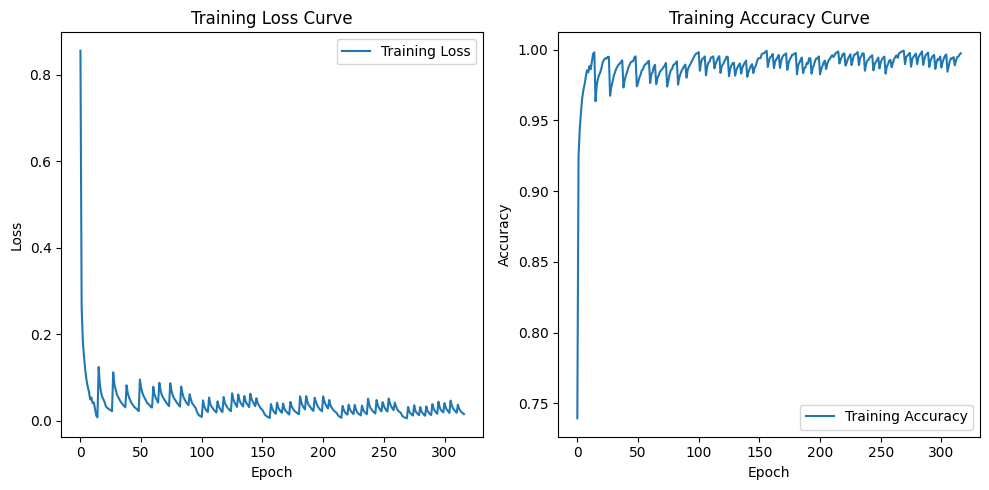

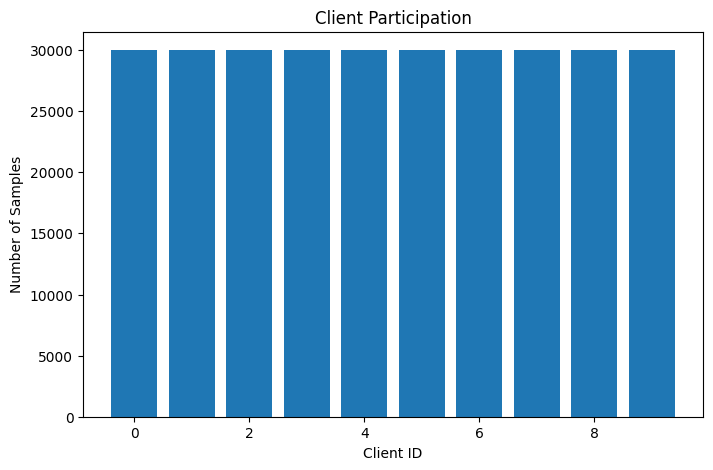

In [29]:
# Plot 1: Training Curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Plot 2: Client Participation
plt.figure(figsize=(8, 5))
plt.bar(range(NUM_CLIENTS), client_samples)
plt.xlabel('Client ID')
plt.ylabel('Number of Samples')
plt.title('Client Participation')
plt.show()


Epoch 1/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9824 - val_loss: 0.0557 - learning_rate: 1.0000e-04
Epoch 2/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9980 - loss: 0.0103 - val_accuracy: 0.9826 - val_loss: 0.0571 - learning_rate: 1.0000e-04
Epoch 3/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9972 - loss: 0.0089 - val_accuracy: 0.9827 - val_loss: 0.0574 - learning_rate: 1.0000e-04
Epoch 4/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9983 - loss: 0.0074 - val_accuracy: 0.9829 - val_loss: 0.0575 - learning_rate: 1.0000e-04
Epoch 5/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9997 - loss: 0.0047 - val_accuracy: 0.9819 - val_loss: 0.0601 - learning_rate: 1.0000e-04
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9898 - loss: 0.0296 - val_accuracy: 0.9820 - val_loss: 0.0581 - learning_rate: 1.0000e-04
Epoch 2/15
188/188 ━━━━

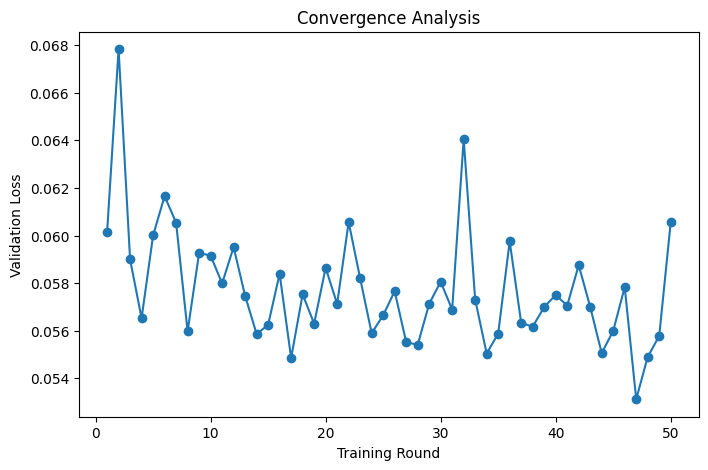

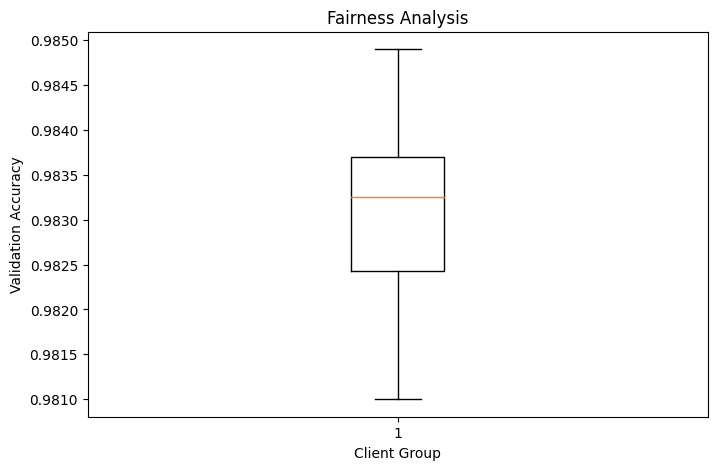

W0000 00:00:1713178642.881760      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713178646.178587      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9738 - loss: 0.1143
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9795 - loss: 0.0706


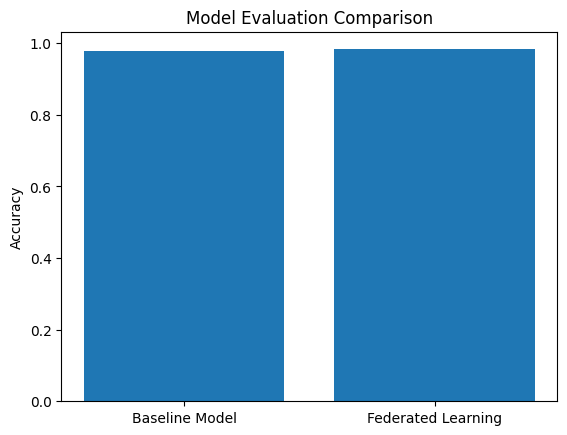

In [30]:

from sklearn.metrics import accuracy_score

validation_losses = []
validation_accuracies = []

for round_num in range(5): 
    for client_id in range(NUM_CLIENTS): 
        client_X_train = X_train[client_id * CLIENT_DATASET_SIZE : (client_id + 1) * CLIENT_DATASET_SIZE]
        client_y_train = y_train[client_id * CLIENT_DATASET_SIZE : (client_id + 1) * CLIENT_DATASET_SIZE]
        
        history = model.fit(client_X_train, client_y_train, validation_data=(X_test, y_test),
                            epochs=15, batch_size=32, callbacks=[early_stopping, reduce_lr])
        
        client_samples[client_id] += len(client_X_train)
        
        validation_losses.append(history.history['val_loss'][-1])
        y_pred = model.predict(X_test)
        validation_accuracies.append(accuracy_score(y_test, np.argmax(y_pred, axis=1)))
    
    global_loss, global_accuracy = model.evaluate(X_test, y_test)
    print('Round {}: Global Loss={}, Global Accuracy={}'.format(round_num, global_loss, global_accuracy))

# Plot 3: Convergence Analysis
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(validation_losses) + 1), validation_losses, marker='o')
plt.xlabel('Training Round')
plt.ylabel('Validation Loss')
plt.title('Convergence Analysis')

plt.show()


# Plot 5: Fairness Analysis
plt.figure(figsize=(8, 5))
plt.boxplot(validation_accuracies)
plt.xlabel('Client Group')
plt.ylabel('Validation Accuracy')
plt.title('Fairness Analysis')

plt.show()

# Plot 6: Model Evaluation Comparison (Example with a baseline model)
baseline_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
baseline_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32, verbose=0)

baseline_loss, baseline_accuracy = baseline_model.evaluate(X_test, y_test)
fl_loss, fl_accuracy = model.evaluate(X_test, y_test)

plt.bar(['Baseline Model', 'Federated Learning'], [baseline_accuracy, fl_accuracy])
plt.ylabel('Accuracy')
plt.title('Model Evaluation Comparison')
plt.show()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9800 - loss: 0.0619 - val_accuracy: 0.9808 - val_loss: 0.0640
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9850 - loss: 0.0459 - val_accuracy: 0.9819 - val_loss: 0.0593
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9863 - loss: 0.0417 - val_accuracy: 0.9829 - val_loss: 0.0577
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9886 - loss: 0.0345 - val_accuracy: 0.9812 - val_loss: 0.0681
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9910 - loss: 0.0296 - val_accuracy: 0.9838 - val_loss: 0.0571
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9838
Precision: 0.983885714163249
Recall: 0.9838
F1 Score: 0.9838076342110594
Confusion Matrix:
 [[ 967    1    0    0    1    1    4    2    3    1]
 [   0 1133    1    0    0    0    0    1    0    0]
 [   1    1 1018    0    2    0    1    9    0    0]
 [   0    0    6  989    0    1    0   11    2

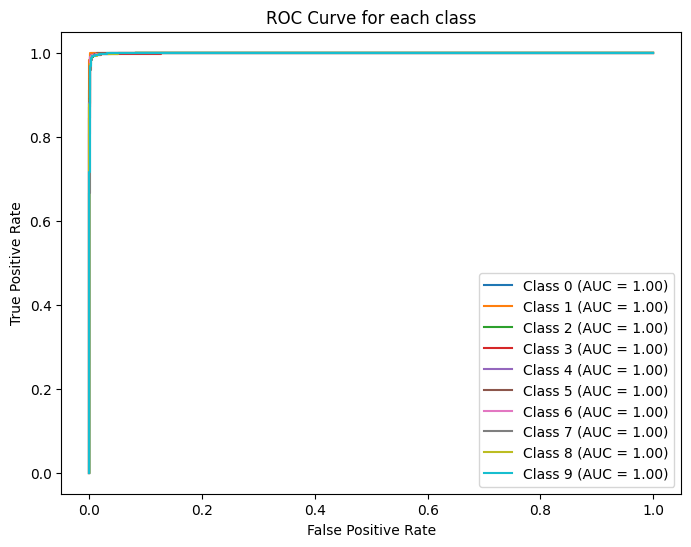

In [31]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):  
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])  
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend()
plt.show()

In [32]:
print(X_train.shape)

(60000, 28, 28)


Epoch 1/5
  99/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5870 - loss: 1.3875

W0000 00:00:1713178731.990733      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1475/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.4816

W0000 00:00:1713178734.938606      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8636 - loss: 0.4783 - val_accuracy: 0.9567 - val_loss: 0.1588
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9616 - loss: 0.1376 - val_accuracy: 0.9666 - val_loss: 0.1142
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9736 - loss: 0.0911 - val_accuracy: 0.9718 - val_loss: 0.0920
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9815 - loss: 0.0622 - val_accuracy: 0.9729 - val_loss: 0.0924
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9837 - loss: 0.0516 - val_accuracy: 0.9751 - val_loss: 0.0834


PermutationExplainer explainer: 101it [10:52,  6.59s/it]


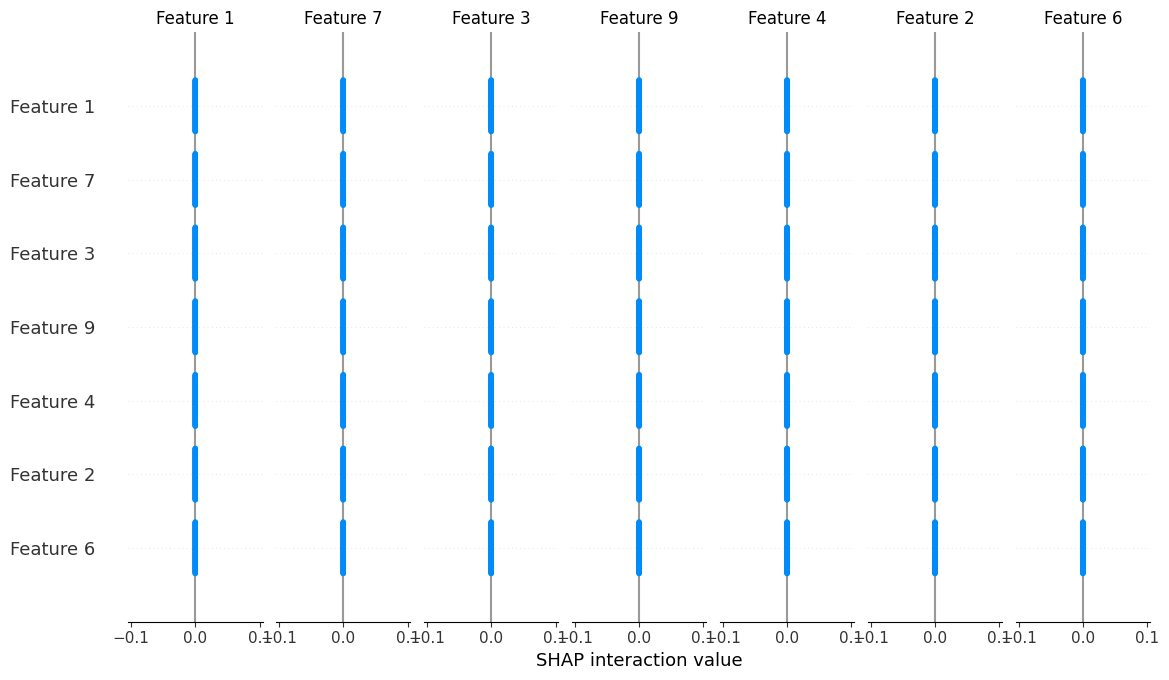

In [33]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import shap


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flattened, y_train, test_size=0.2, random_state=42)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_flattened.shape[1],)),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_split, y_train_split, epochs=5, validation_data=(X_val, y_val))

explainer = shap.Explainer(model, masker=shap.maskers.Independent(data=X_train_split))

shap_values = explainer.shap_values(X_test_flattened[:100])

shap.summary_plot(shap_values, features=X_test_flattened[:100])
